## Different approaches to parallelization

Here I provide some basic examples on how to parallelize tasks in Python.
Our starting point will be an artificially slow function that mimics the signature of `get_row_audio`.

In [1]:
import time
def slow_row_operation(row, delay=1, verbose=False):
    if verbose:
        print(row["key"])
    
    time.sleep(delay)

    return "This represents audio", "This represents rate"

We want to run this function once per row in the dataframe:

In [2]:
import pandas as pd
df = pd.read_csv("test_input.csv")
len(df)

20

## Loop
Running the function in a loop will roughly take us `len(df) * delay` seconds.

In [3]:
%%time
for i in range(len(df)):
    slow_row_operation(df.iloc[i], verbose=True)

/german1/5298
/german1/5298
/sambas1/SBS-20111031
/sambas1/SBS-20111031
/german1/4123
/german1/4123
/catalan1/ca_f37s_f38s_und
/catalan1/ca_f37s_f38s_und
/arapaho1/25b
/arapaho1/25b
/catalan1/ca_f02a_m05a_und
/catalan1/ca_f02a_m05a_und
/german1/6297
/german1/6297
/catalan1/ca_m47s_f48s_und
/catalan1/ca_m47s_f48s_und
/polish1/MW_002
/polish1/MW_004
/arapaho1/24a
/arapaho1/24a
CPU times: user 31.9 ms, sys: 6.08 ms, total: 38 ms
Wall time: 20 s


## Using `map`
Maps are useful alternatives to loops, and usually more efficient.
This is not going to be the ase here though.
Anyways, the map structure will be a stepping stone to our next approach.

In [4]:
maps = map(slow_row_operation, df.iterrows())
list(maps)

[('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This repr

## Dask bags
We can build a dask bag with containing our rows.
This way, we tell Python that our function can be applied to each element of the bag **independently**.

In [5]:
import dask.bag as db
bag = db.from_sequence(df.iterrows())


One of the nice features of dask is that it allows to visualize the workflows before executing them:

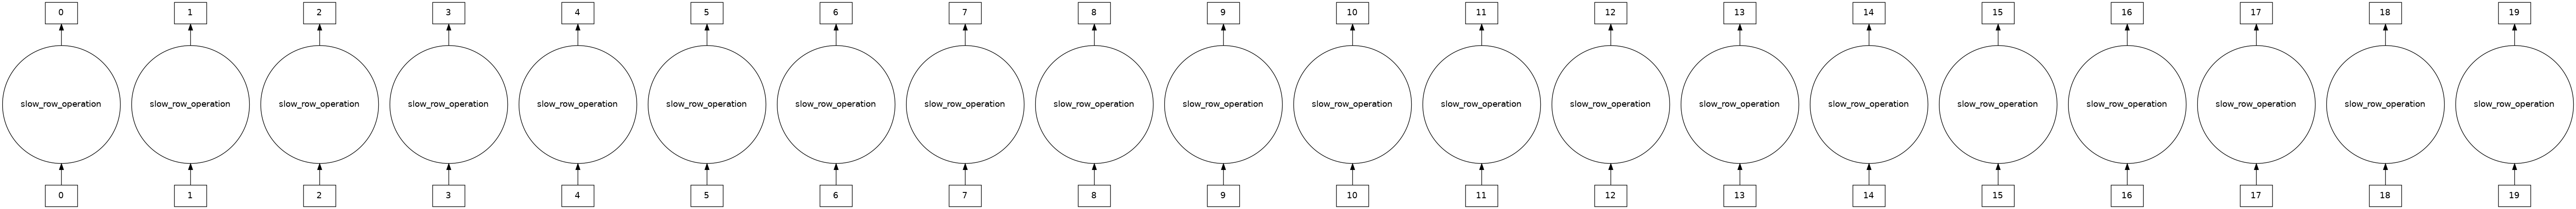

In [6]:
bag.map(slow_row_operation).visualize()

Let's run it and time it.
This time there will be an acceleration!
Many cores have been simultaneously waiting.

In [7]:
%%time
bag.map(slow_row_operation).compute()

CPU times: user 36.1 ms, sys: 2.06 ms, total: 38.2 ms
Wall time: 7.98 s


[('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This represents audio', 'This represents rate'),
 ('This repr

## Dask dataframes
Dask also supports optimized dataframes.

In [8]:
import dask.dataframe as dd
df_opt = dd.from_pandas(df, npartitions=8)

We can apply most of the usual pandas operations:

In [9]:
df_opt.apply(slow_row_operation, axis=1).compute()

/home/pablo/Desktop/temp/ffmpeg-test/.venv/lib/python3.10/site-packages/dask_expr/_collection.py:3260: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'object'))

  warnings.warn(meta_warning(meta))


0     (This represents audio, This represents rate)
1     (This represents audio, This represents rate)
2     (This represents audio, This represents rate)
3     (This represents audio, This represents rate)
4     (This represents audio, This represents rate)
5     (This represents audio, This represents rate)
6     (This represents audio, This represents rate)
7     (This represents audio, This represents rate)
8     (This represents audio, This represents rate)
9     (This represents audio, This represents rate)
10    (This represents audio, This represents rate)
11    (This represents audio, This represents rate)
12    (This represents audio, This represents rate)
13    (This represents audio, This represents rate)
14    (This represents audio, This represents rate)
15    (This represents audio, This represents rate)
16    (This represents audio, This represents rate)
17    (This represents audio, This represents rate)
18    (This represents audio, This represents rate)
19    (This 